<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/first_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# 1 Creation du dataset

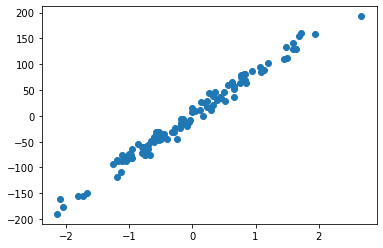

In [ ]:
x,y = make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [ ]:
print(x.shape)
print(y.shape) 

(100, 1)
(100,)


la dimension de y est incomplète

In [ ]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [ ]:
#matrice X 
X = np.hstack((x,np.ones(x.shape)))


In [ ]:
#on doit ensuite initialiser théta, 
#on ne le connait pas, c'est la machine qui va trouver le théta qui minimise la fonction de coût
#on se contente d'initialiser théta avec des valeurs aléatoires
theta = np.random.randn(2,1)
theta

array([[-1.34665423],
       [ 0.88437673]])

# 2 Création du modèle

In [ ]:
#c'est une regression linéaire, de la forme Y = F*theta
def model(X,theta):
    return X.dot(theta)

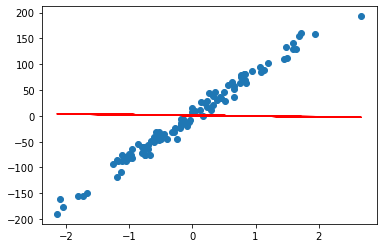

In [ ]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')

Pour l'intant, avec notre théta, on voit que notre modèle ne correspond pas du tout à notre dataset. Il faut maintenant calculer la fonction de coût

# 3 fonction de coût

In [ ]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [ ]:
cost_function(X,y,theta)

3395.5498222112897

ce coût doit tendre vers 0

# 4 gradient et descente du gradient

In [ ]:
def grad(X,y,theta):
    m=len(y)
    return 1/m*X.T.dot(model(X,theta)-y)

In [ ]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    theta_history=np.zeros((n_iterations,2))
    for i in range(0,n_iterations):
        theta=theta-learning_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        theta_history[i]=theta.T
    return theta,cost_history,theta_history

# Machine learning

In [ ]:
theta_final,cost_history,theta_history = gradient_descent(X,y,theta,learning_rate=0.001,n_iterations=1000)

In [ ]:
theta_final

array([[49.96227808],
       [-1.15112293]])

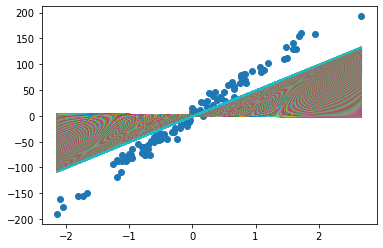

In [ ]:
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')
for i in range(0,1000):
    plt.plot(x,model(X,theta_history[i]))

Notre programme a appris, mais ce n'est pas encore satisfaisant
* augmenter le nombre d'itérations
* augmenter le learning rate (car on fait peut être de trop petit pas)  


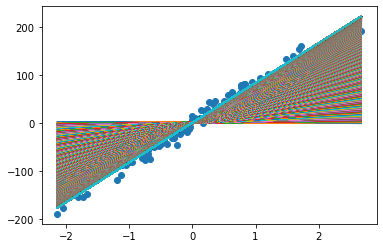

In [ ]:
theta_final,cost_history,theta_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')
for i in range(0,1000):
    plt.plot(x,model(X,theta_history[i]))

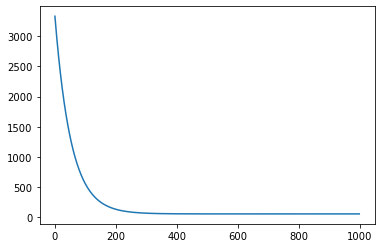

In [ ]:
plt.plot(range(1000),cost_history)

On voit qu'a travers le temps, le coût diminue

In [ ]:
#c'est le R2
def coeff_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coeff_determination(y,prediction)

0.9830223892981171

On voit que notre R2 n'est pas terrible, il faudrait réentrainer notre programme ou avoir un meilleure model